In [1]:
import numpy as np
import torch, torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Neural Networks using PyTorch framework
---
![](resources/torch.png)
## Comparing performance of classical networks to convolutional neural networks 

## Typical Deep Learning workflow:

1. Load your training datasets, and(if needed) convert them into PyTorch datasets
2. Build PyTorch-DataLoaders using your datasets, set shuffle = True and define batch size
3. Define the neural network structure
4. Training process:
    - Define optimizer
    - Define loss function
    - Define # of training iterations
    - Train your model
5. Evaluation process:
    - Use your model to predict labels for your test set
    - evaluate accuracy with true labels

# Part I: Pair programming

## Get the training data

In [2]:
# Get the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

training_data = torchvision.datasets.MNIST('data/', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST('data/', train=False, download=True, transform=transform)

In [ ]:
training_data = CustomDataset(data, labels)

In [40]:
class CustomDataset():

    def __init__(self, data, labels):

        self.data = torch.Tensordata
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data.shape[0])

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return datapoint, target

tensor(5)

## Look at the data more closely

In [12]:
test_data_point = training_data.data[0]
test_target = training_data.targets[0]

In [13]:
print(f'Shape of data sample: {np.array(test_data_point).shape}')
print(f'First row of data sample: {np.array(test_data_point)[0]}')

Shape of data sample: (28, 28)
First row of data sample: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


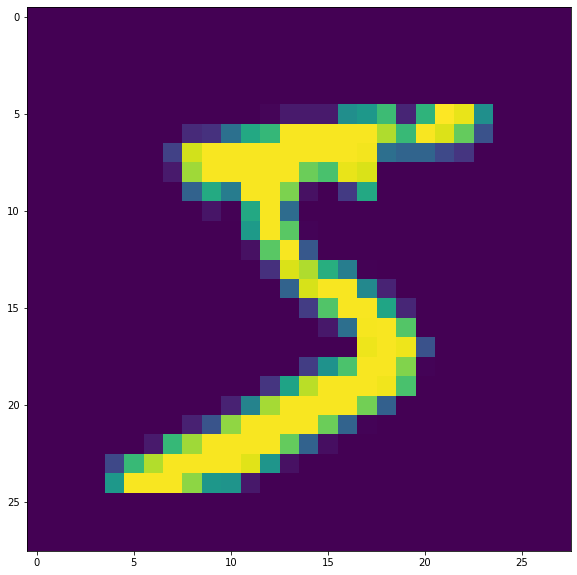

Label: 5


In [19]:
fig = plt.figure(figsize=(10,10))

plt.imshow(test_data_point)
plt.show()

print(f'Label: {test_target}')

## Create dataloaders to feed data into our neural network

In [20]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testing_data, batch_size=batch_size, shuffle=True)

In [30]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

# Define the network

In [21]:
class NeuralNet(torch.nn.Module):
    
    def __init__(self, input_dim, num_classes):
        super(NeuralNet, self).__init__()
        
        self.input_dim = input_dim
        self.num_classes = num_classes
        
        self.linear_layer1 = torch.nn.Linear(self.input_dim, 100)
        self.linear_layer2 = torch.nn.Linear(100, 50)
        self.linear_layer3 = torch.nn.Linear(50, self.num_classes)
        
    def forward(self, x):
        
        # Layer 1 + activation
        x = self.linear_layer1(x.view(-1, self.input_dim))
        x = F.sigmoid(x)
        
        # Layer 2 + activation
        x = self.linear_layer2(x)
        x = F.sigmoid(x)
        
        # Layer 3 + activation
        x = self.linear_layer3(x)
        x = F.sigmoid(x)
        
        return x

## Training loop

In [22]:
# Build an object of the neural network
# Optimizer
# Define a Loss Function
# Run the training loop

neural_net = NeuralNet(784, 10)
optimizer = torch.optim.SGD(params=neural_net.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

In [23]:
# training loop:

for epoch in range(10):
    running_loss = 0.0
    
    for i, (x, y) in enumerate(train_loader, 1):
        
        # set optimizer gradients to zero
        optimizer.zero_grad()
        
        # forward pass
        predictions = neural_net.forward(x)
        
        # backward pass + optimization step
        loss = loss_fn(predictions, y)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        
        if i % 1000 == 0:
            print(f'Epoch: {epoch}, loss: {running_loss / i}')
        
    print(f'Loss after epoch: {epoch} = {running_loss / len(train_loader)}')

D:\software\anaconda\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0, loss: 2.3022429451942443
Epoch: 0, loss: 2.3007626662254332
Epoch: 0, loss: 2.299957752227783
Loss after epoch: 0 = 2.299291226196289
Epoch: 1, loss: 2.2946997702121736
Epoch: 1, loss: 2.293743654131889
Epoch: 1, loss: 2.2925852898756665
Loss after epoch: 1 = 2.2913902076721193
Epoch: 2, loss: 2.282484582901001
Epoch: 2, loss: 2.2793360310792923
Epoch: 2, loss: 2.274843676249186
Loss after epoch: 2 = 2.2706192380905152
Epoch: 3, loss: 2.23801264667511
Epoch: 3, loss: 2.226839868307114
Epoch: 3, loss: 2.2125319498380027
Loss after epoch: 3 = 2.200229097811381
Epoch: 4, loss: 2.118838673591614
Epoch: 4, loss: 2.0975600358247757
Epoch: 4, loss: 2.078076052904129
Loss after epoch: 4 = 2.0646990529378257
Epoch: 5, loss: 1.9822263782024383
Epoch: 5, loss: 1.9683685910105706
Epoch: 5, loss: 1.955557133158048
Loss after epoch: 5 = 1.9464758664449056
Epoch: 6, loss: 1.8920758652687073
Epoch: 6, loss: 1.8842118031978607
Epoch: 6, loss: 1.8758384487231572
Loss after epoch: 6 = 1.8702470

# Evaluation loop

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = neural_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

## Compare regular Multilayer-perceptron performance against Convolutional neural network

### How to compute output size after convolutional layer ??:
- If you just set the channel input size, channel output size, kernel size for your Conv2D function -> output width = input_width - kernel_width + 1
- Same for output height

### How to compute output size after pooling layer ??:
- If you just set the kernel size of your pooling layer, without inputing any other arguments -> output width = input_width / kernel_width
- Same for output height

#### If you change other input arguments to the Conv/MaxPool functions, the output sizes will be computed as explained in the docs:
https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d

- Nice visualizations of different kernel/filter/convolution strategies: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

In [19]:
class ConvNet(torch.nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.conv2 = torch.nn.Conv2d(6, 16, 5)
        self.pool = torch.nn.MaxPool2d(2, 2)
        
        self.fc1 = torch.nn.Linear(16 * 4 * 4, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        
        # Input(batch_size, 1, 28, 28)
        x = F.relu(self.conv1(x))
        
        # Input(batch_size, 6, 24, 24)
        x = self.pool(x)
        
        # Input(batch_size, 16, 12, 12)
        x = F.relu(self.conv2(x))
        
        # Input(batch_size, 16, 8, 8)
        x = self.pool()
        
        # Input(batch_size, 16, 4, 4)
        x = x.view(-1, 16 * 4 * 4)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [20]:
# Build an object of the neural network
# Optimizer
# Define a Loss Function
# Run the training loop

neural_net = ConvNet()
optimizer = torch.optim.SGD(params=neural_net.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# training loop:
for epoch in range(10):
    
    running_loss = 0.0
    
    for i, (x, y) in enumerate(train_loader, 1):
        
        # set optimizer gradients to zero
        optimizer.zero_grad()
        
        # forward pass
        predictions = neural_net.forward(x)
        
        # backward pass + optimization step
        loss = loss_fn(predictions, y)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        
        if i % 1000 == 0:
            print(f'Epoch: {epoch}, loss: {running_loss / i}')
        
    print(f'\nLoss after epoch: {epoch} = {running_loss / len(train_loader)}')

# Evaluation loop

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = neural_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# Part II: Build your own Neural Network classifiers:

### Todos:
1. Load the CIFAR 10 train and test dataset from the torchvision library that we have used above for the MNIST data:
Documentation: https://pytorch.org/docs/stable/torchvision/datasets.html

2. Create DataLoaders for the training and test size:
    - experiment with different batch sizes
3. Create one fully connected model and another Convolutional Neural Network, for each experiment with different layer sizes(# of neurons) and layer types:
    - Conv layers preprocess the data
    - Pooling layers preprocess the data
    - Fully connected layer need to be added at the end to classify the data

## Note: In this solution I only used 1 fully-connected(torch.nn.Linear) layer since it accelarates the training process significantly

4. Evaluate the prediction accuracy(all correct classified points / number of points) of your Fully-connected and Convolutional Neural Networks

5. Evaluate prediction accuracy of each class, e.g.: Correctly classified: 60% of planes, 70% of cars, 30% of housed etc.

In [2]:
# Get the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

training_data = torchvision.datasets.CIFAR10('data/', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.CIFAR10('data/', train=False, download=True, transform=transform)

batch_size = 16
train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testing_data, batch_size=batch_size, shuffle=True)

0it [00:00, ?it/s]

 99%|█████████▉| 169467904/170498071 [00:11<00:00, 16541592.04it/s]

Files already downloaded and verified


In [27]:
class ConvNetCifar10(torch.nn.Module):
    
    def __init__(self):
        super(ConvNetCifar10, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(3, 6, 5)
        self.conv2 = torch.nn.Conv2d(6, 16, 5)
        self.pool = torch.nn.MaxPool2d(2, 2)
        
        self.fc1 = torch.nn.Linear(16 * 5 * 5, 10)

    def forward(self, x):
        
        # Input(batch_size, 1, 28, 28)
        x = F.relu(self.conv1(x))
        
        # Input(batch_size, 6, 24, 24)
        x = self.pool(x)
        
        # Input(batch_size, 16, 12, 12)
        x = F.relu(self.conv2(x))
        
        # Input(batch_size, 16, 8, 8)
        x = self.pool(x)
                
        # Input(batch_size, 16, 4, 4)
        x = x.view(-1, 16 * 5 * 5)
        
        x = self.fc1(x)
        
        return x

In [28]:
# Build an object of the neural network
# Optimizer
# Define a Loss Function
# Run the training loop

neural_net = ConvNetCifar10()
optimizer = torch.optim.SGD(params=neural_net.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

In [29]:
# training loop:
for epoch in range(10):
    
    running_loss = 0.0
    
    for i, (x, y) in enumerate(train_loader, 1):
        
        # set optimizer gradients to zero
        optimizer.zero_grad()
        
        # forward pass
        predictions = neural_net.forward(x)
        
        # backward pass + optimization step
        loss = loss_fn(predictions, y)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        
        if i % 1000 == 0:
            print(f'Epoch: {epoch}, loss: {running_loss / i}')
        
    print(f'\nLoss after epoch: {epoch} = {running_loss / len(train_loader)}')

Epoch: 0, loss: 2.008464808821678
Epoch: 0, loss: 1.8425456362366677
Epoch: 0, loss: 1.7432613690098127

Loss after epoch: 0 = 1.7341665418815613
Epoch: 1, loss: 1.472133158683777
Epoch: 1, loss: 1.4439459372758865
Epoch: 1, loss: 1.4211917668183645

Loss after epoch: 1 = 1.4177743427276612
Epoch: 2, loss: 1.3192310163378715
Epoch: 2, loss: 1.3122816373705863
Epoch: 2, loss: 1.301391716102759

Loss after epoch: 2 = 1.297793385734558
Epoch: 3, loss: 1.236536273777485
Epoch: 3, loss: 1.2335844233632087
Epoch: 3, loss: 1.231391068160534

Loss after epoch: 3 = 1.2304240695762634
Epoch: 4, loss: 1.1988790969252587
Epoch: 4, loss: 1.1896469817608595
Epoch: 4, loss: 1.1822293835083644

Loss after epoch: 4 = 1.1800174136543273
Epoch: 5, loss: 1.1536464096307755
Epoch: 5, loss: 1.1492350935935973
Epoch: 5, loss: 1.143739526460568

Loss after epoch: 5 = 1.1428605481052398
Epoch: 6, loss: 1.1082255973815918
Epoch: 6, loss: 1.109588011711836
Epoch: 6, loss: 1.1132366749445597

Loss after epoch: 6 

In [30]:
correct = 0
total = 0

with torch.no_grad():
    
    for (x, y) in test_loader:
        
        predictions = neural_net(x)
        
        _, predicted = torch.max(predictions.data, 1)
        
        total += y.size(0)
        
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [33]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    
    for (x, y) in test_loader:
        
        predictions = neural_net(x)
        
        _, predicted = torch.max(predictions, 1)
        
        c = (predicted == y).squeeze()
        
        for i in range(4):
            label = y[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 72 %
Accuracy of  bird : 46 %
Accuracy of   cat : 36 %
Accuracy of  deer : 54 %
Accuracy of   dog : 58 %
Accuracy of  frog : 78 %
Accuracy of horse : 72 %
Accuracy of  ship : 81 %
Accuracy of truck : 71 %
